In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme()

def filter_by_column(results, column, pattern):
    return results[results[column].str.contains(pattern)]

def filter_to_dataset(results, dataset_pattern):
    return filter_by_column(results, 'dataset', dataset_pattern)

model_name_mapping = {
    'random_forest': 'Random Forest Regression',
    'ridge': 'Ridge Regression',
    'neural_network': 'Neural Network'
}

def model_name_mapping_func(value):
    return model_name_mapping[value]
    
def map_values_to_displayable(dataframe, mapping={'model': model_name_mapping_func}):
    dataframe = dataframe.copy()
    for column, mapping_func in mapping.items():
        dataframe[column] = dataframe[column].map(mapping_func)
    return dataframe
    


# Import datasets

In [50]:
results_v1 = pd.read_csv('output-models/results_1.0.csv')
predictions_v1 = pd.read_csv('output-models/predictions_all_seasons_merged_mult_feature-selected_1.0.csv')

# Test RMSE For All (Compare datasets)

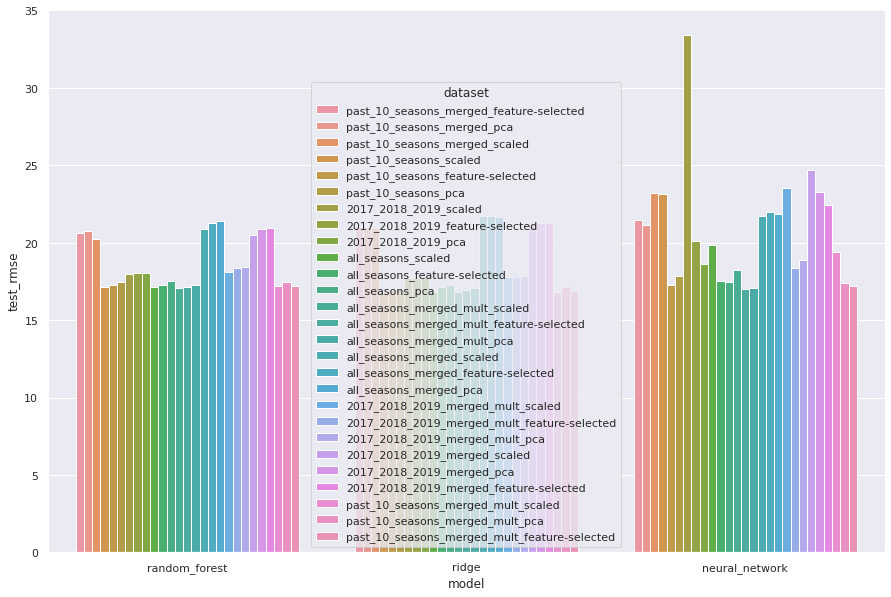

In [51]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="model", hue="dataset", y="test_rmse", data=results_v1, ax=ax)
plt.show()

# Test R^2 For All (Compare datasets)

[Text(0.5, 0, 'Model Type'),
 Text(0, 0.5, '$R^2$'),
 Text(0.5, 1.0, 'All Test Datasets (Grouped by Model) $R^2$')]

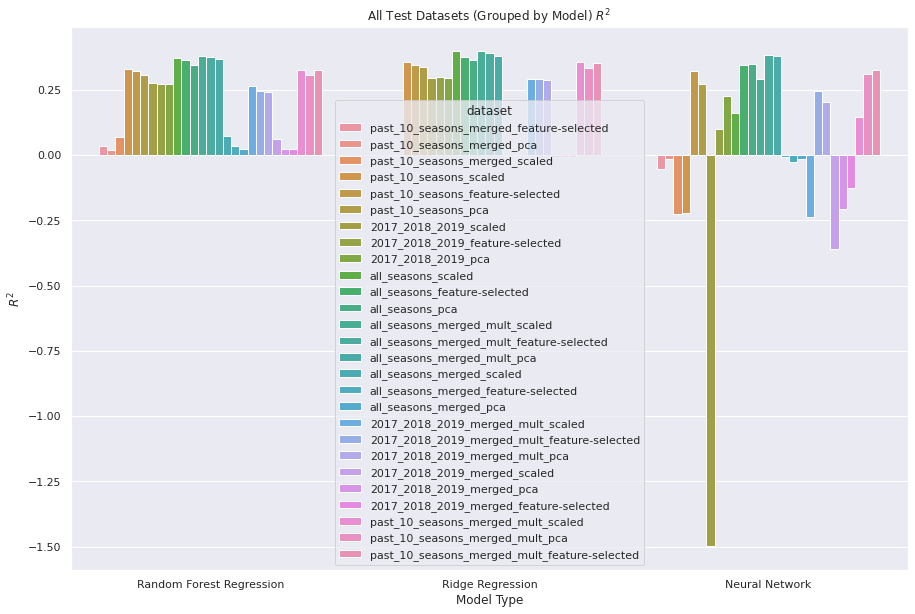

In [52]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="model", hue="dataset", y="test_r_2", data=map_values_to_displayable(results_v1), ax=ax)\
.set(xlabel='Model Type', ylabel='$R^2$', title='All Test Datasets (Grouped by Model) $R^2$')

# Comparing Datasets Across Ridge Regression (RMSE)

[Text(0.5, 0, 'RMSE'),
 Text(0, 0.5, 'Dataset'),
 Text(0.5, 1.0, 'All Test Datasets Ridge Regression RMSE')]

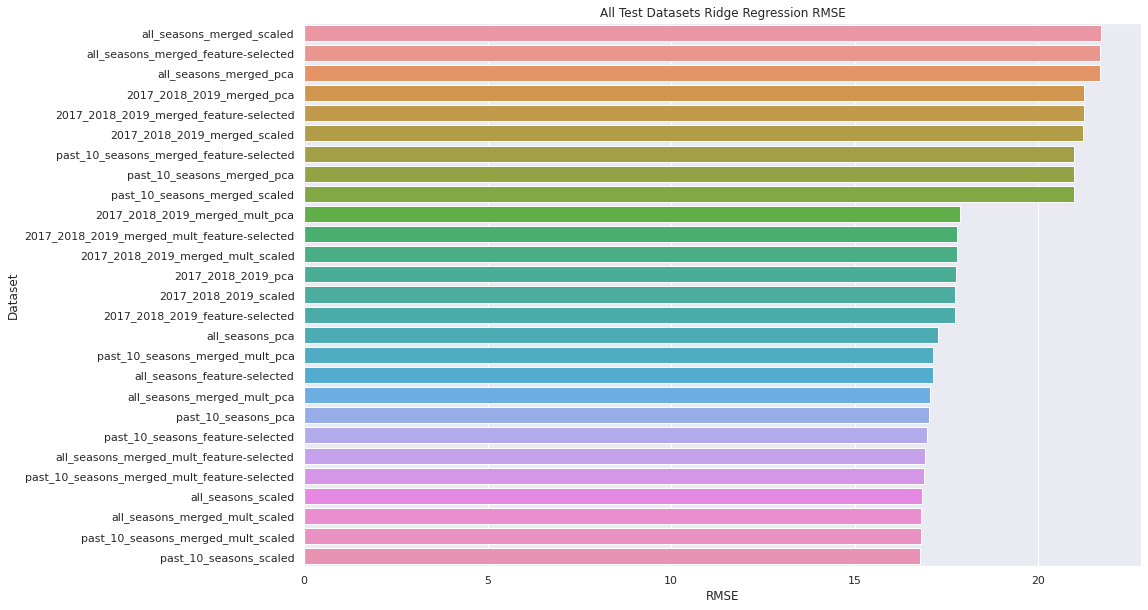

In [61]:
fig, ax = plt.subplots(figsize=(15, 10))
data = filter_by_column(results_v1, 'model', 'ridge').sort_values(by=['test_rmse'], ascending=False)
sns.barplot(y="dataset", x="test_rmse", orient='h', data=map_values_to_displayable(data), ax=ax, dodge=True)\
.set(xlabel='RMSE', ylabel='Dataset', title='All Test Datasets Ridge Regression RMSE')

# Comparing Datasets Across Ridge Regression (R^2)

[Text(0.5, 0, '$R^2$'),
 Text(0, 0.5, 'Dataset'),
 Text(0.5, 1.0, 'All Test Datasets Ridge Regression $R^2$')]

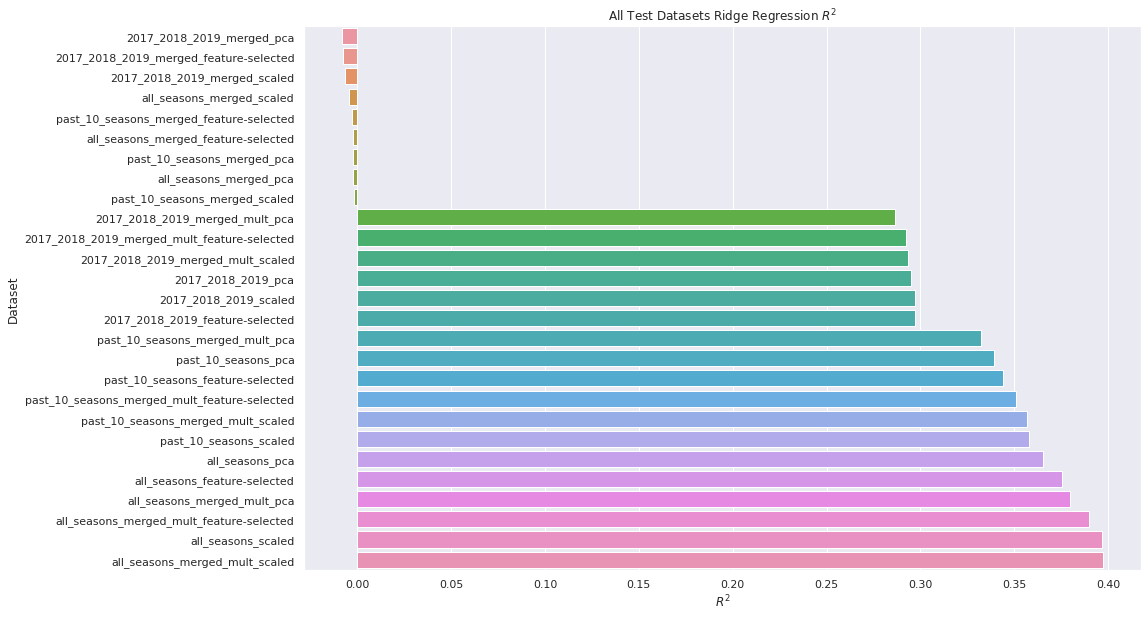

In [63]:
fig, ax = plt.subplots(figsize=(15, 10))
data = filter_by_column(results_v1, 'model', 'ridge').sort_values(by=['test_r_2'])
sns.barplot(y="dataset", x="test_r_2", orient='h', data=map_values_to_displayable(data), ax=ax, dodge=True)\
.set(xlabel='$R^2$', ylabel='Dataset', title='All Test Datasets Ridge Regression $R^2$')

# The Effect of Merging by Difference

[Text(0.5, 0, 'Dataset (Before and After Merge)'),
 Text(0, 0.5, 'RMSE'),
 Text(0.5, 1.0, 'Effect of Merging on 2017, 2018, 2019 Test Dataset Grouped by Model (RMSE)')]

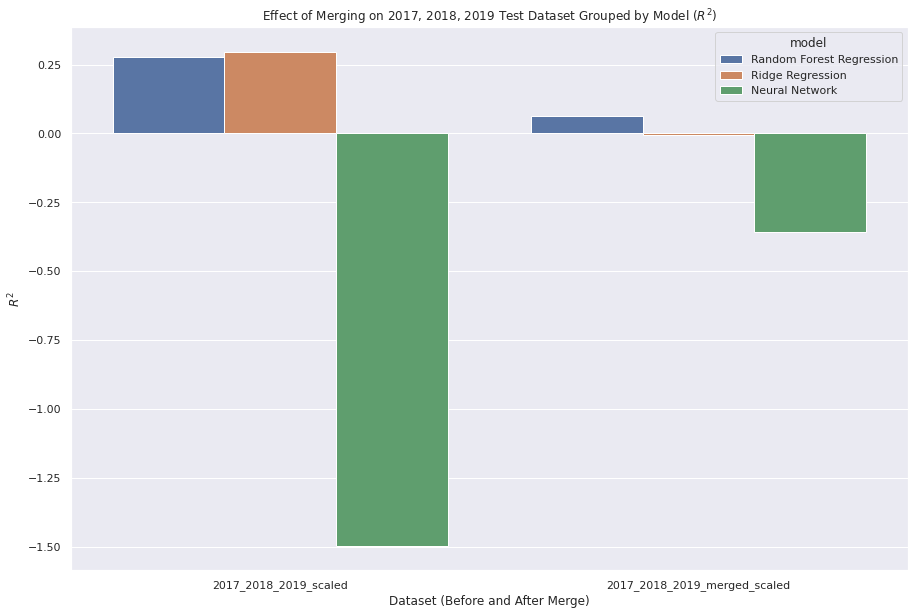

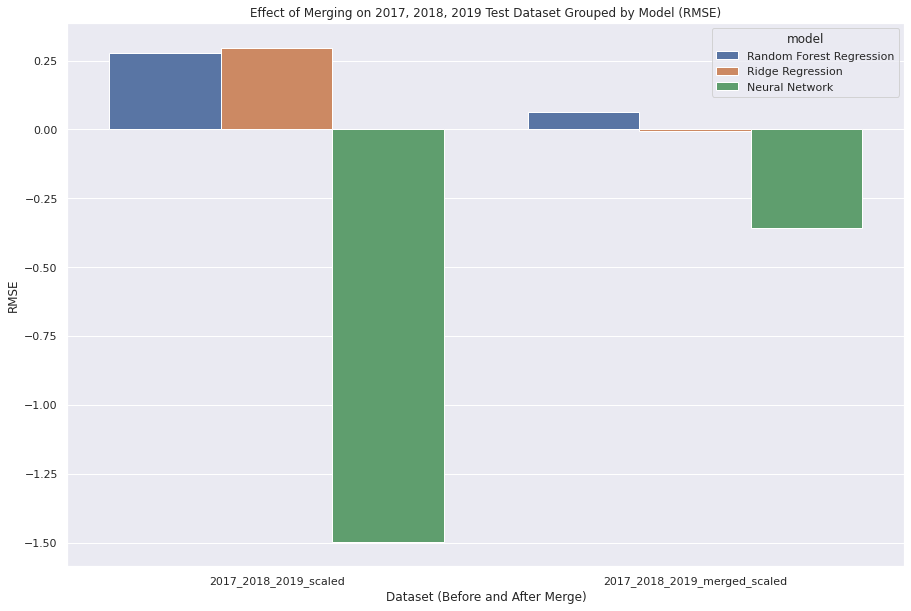

In [55]:
# diff merge
data = map_values_to_displayable(pd.concat([filter_to_dataset(results_v1, "2017_2018_2019_scaled"), filter_to_dataset(results_v1, "2017_2018_2019_merged_scaled")]))
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="dataset", y="test_r_2", hue="model", data=data, ax=ax, dodge=True)\
.set(xlabel='Dataset (Before and After Merge)', ylabel='$R^2$', title='Effect of Merging on 2017, 2018, 2019 Test Dataset Grouped by Model ($R^2)$')

# mult merge
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="dataset", y="test_r_2", hue="model", data=data, ax=ax, dodge=True)\
.set(xlabel='Dataset (Before and After Merge)', ylabel='RMSE', title='Effect of Merging on 2017, 2018, 2019 Test Dataset Grouped by Model (RMSE)')


# Feature Selection and PCA (R^2)

<AxesSubplot:xlabel='dataset', ylabel='test_r_2'>

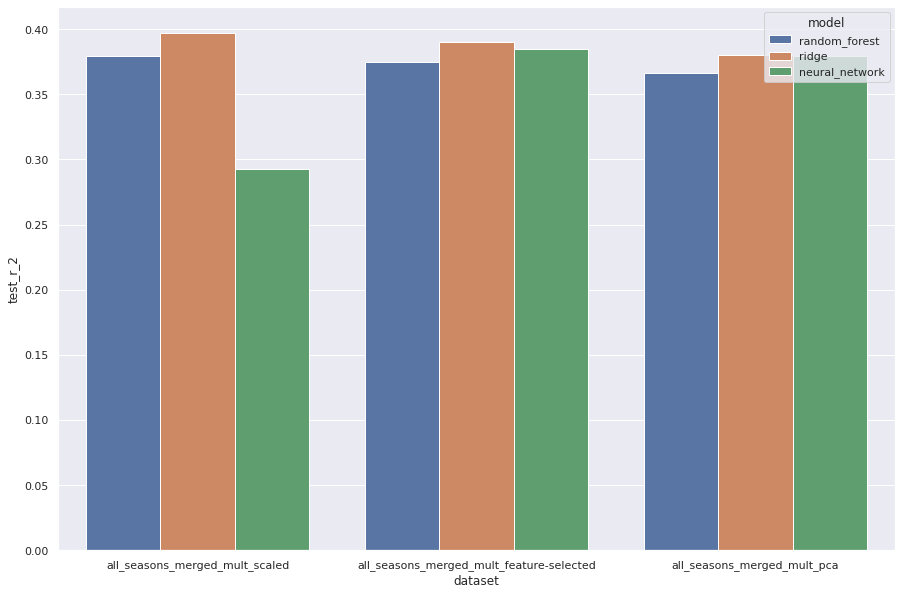

In [14]:
data = pd.concat([filter_to_dataset(results_v1, "all_seasons_merged_mult_")])
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="dataset", y="test_r_2", hue="model", data=data, ax=ax, dodge=True)

# Feature Selection and PCA (RMSE)

[Text(0.5, 0, 'Variant (Just Scaling; Scaling and Feature Selection; All Transformations)'),
 Text(0, 0.5, 'RMSE'),
 Text(0.5, 1.0, 'A Comparison of the 3 Variant (Test) Datasets for "All Seasons Merged via Multiplication" Dataset')]

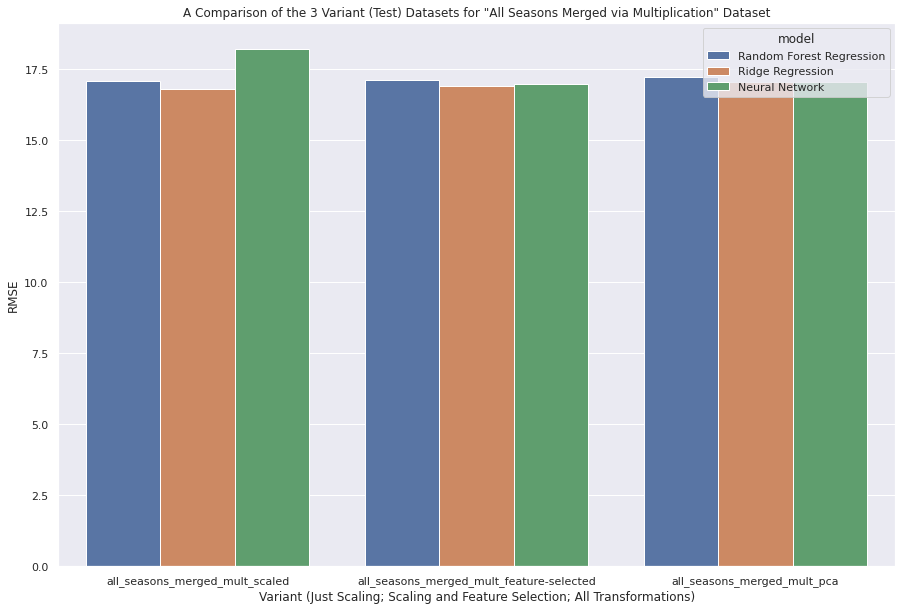

In [74]:
data = pd.concat([filter_to_dataset(results_v1, "all_seasons_merged_mult_")])
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="dataset", y="test_rmse", hue="model", data=map_values_to_displayable(data), ax=ax, dodge=True)\
.set(xlabel='Variant (Just Scaling; Scaling and Feature Selection; All Transformations)', ylabel='RMSE', title='A Comparison of the 3 Variant (Test) Datasets for "All Seasons Merged via Multiplication" Dataset')

# Look at the error relative to the truth value
The goal of this is to find a small range of values the model predicts well. We might want to pursue this range for our categorical model

In the end, little usable information because if we were just predicting the mean, the output would look something like this as well

Index(['truth', 'error'], dtype='object')


<AxesSubplot:xlabel='truth', ylabel='error'>

<AxesSubplot:xlabel='truth', ylabel='error'>

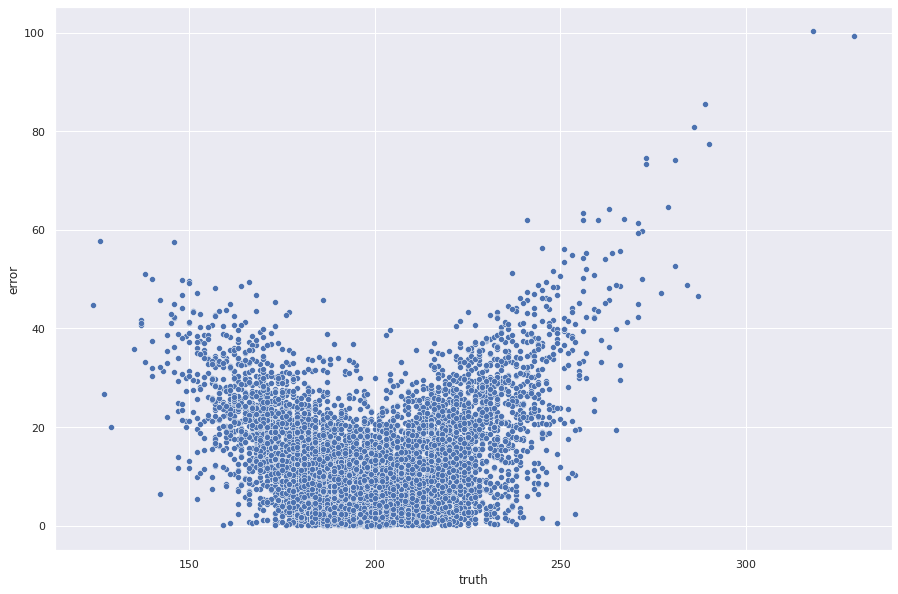

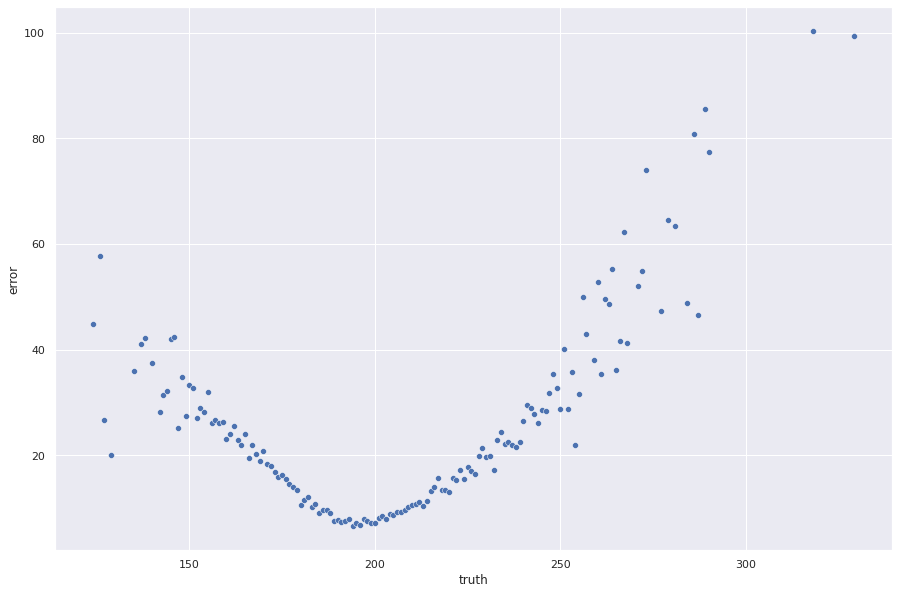

In [48]:
def get_truth_error_df(results, model):
    truth_series = results['truth']
    error_series = (truth_series - results[model]).abs().rename('error')
    return pd.concat([truth_series, error_series], axis=1)
model = 'ridge_regression'
fig, ax = plt.subplots(figsize=(15, 10))
truth_error_df = get_truth_error_df(predictions_v1, model)
print(truth_error_df.columns)
display(sns.scatterplot(x='truth', y='error', data=truth_error_df, ax=ax))

def get_average_error(truth_error_df):
    truth_series = truth_error_df['truth'].to_numpy()
    unique_values = np.unique(truth_series)
    
    truth_and_mean_errors = []
    for unique_truth_value in unique_values:
        error_values = truth_error_df[truth_error_df['truth'] == unique_truth_value]['error']
        mean_error = np.mean(error_values.to_numpy())
        truth_and_mean_errors.append([unique_truth_value, mean_error])
    return pd.DataFrame(data=truth_and_mean_errors, columns=['truth', 'error'])
fig, ax = plt.subplots(figsize=(15, 10))
truth_and_mean_error = get_average_error(truth_error_df)
display(sns.scatterplot(x='truth', y='error', data=truth_and_mean_error, ax=ax))
